### Run the following chunk of code to import any libraries or packages required to run the rest of the script.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### Run the following chunk of code to generate the R-Squared plot which measures the accuracy of the automated counting procedure relative to manual counts.

The user will need to adjust the base_Directory variable, as well as pay careful attetion to the directory structure of the script.

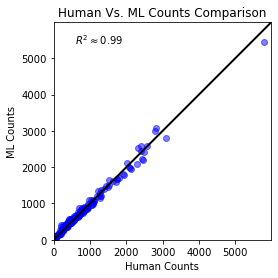

In [13]:
base_Directory = ""
manual_Document = pd.read_csv(base_Directory + "Analysis/Manual_Counts/Counts.csv").sort_values("File Name", ignore_index = True)
automated_Document = pd.read_csv(base_Directory + "Analysis/Automated_Counts/Counts.csv").sort_values("File Name",ignore_index = True)

manual_Names = manual_Document["File Name"]
automated_Names = automated_Document["File Name"]

manual_Counts = []
automated_Counts = []
for i in range(len(automated_Document["Counts"])):
    for j in range(len(manual_Document["Counts"])):
        if automated_Names[i] == manual_Names[j]:
            automated_Counts.append(automated_Document["Counts"][i])
            manual_Counts.append(manual_Document["Counts"][j])
            
limit = 1.1*np.max(automated_Counts)

plt.figure()
plt.gca().set_aspect('equal')
line_Values = np.linspace(0,limit,1001)
plt.scatter(manual_Counts,automated_Counts, color = "blue", alpha = 0.5)
plt.xlim(0,limit)
plt.ylim(0,limit)
plt.plot(line_Values,line_Values, color = "black", lw = "2")
plt.text(limit*0.1,limit*0.9, r'$R^{2} \approx $' + str(np.round(r2_score(manual_Counts,automated_Counts),2)))
plt.title("Human Vs. ML Counts Comparison")
plt.xlabel("Human Counts")
plt.ylabel("ML Counts")
plt.savefig(base_Directory + "Analysis/Outputs/Counts.png")
plt.savefig(base_Directory + "Analysis/Outputs/Counts.svg")
plt.show()